# Importing libraries 

In [1]:
import cv2
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

# TensorFlow 

In [2]:
from tensorflow.keras.models import load_model

# Spliting the image 

In [4]:
#!/usr/bin/env python3

import glob
import os

import cv2

IMGS_DIR = "D:\Dataset\Landcover.ai\images"
MASKS_DIR = "D:\Dataset\Landcover.ai\masks"
OUTPUT_DIR = "./output"

TARGET_SIZE = 512
MAX_IMAGES = 2000 # Limit to 10,000 image-mask pairs

img_paths = glob.glob(os.path.join(IMGS_DIR, "*.tif"))
mask_paths = glob.glob(os.path.join(MASKS_DIR, "*.tif"))

img_paths.sort()
mask_paths.sort()

os.makedirs(OUTPUT_DIR, exist_ok=True)
total_images_created = 0

for i, (img_path, mask_path) in enumerate(zip(img_paths, mask_paths)):
    img_filename = os.path.splitext(os.path.basename(img_path))[0]
    mask_filename = os.path.splitext(os.path.basename(mask_path))[0]
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)

    assert img_filename == mask_filename and img.shape[:2] == mask.shape[:2]

    k = 0
    for y in range(0, img.shape[0], TARGET_SIZE):
        for x in range(0, img.shape[1], TARGET_SIZE):
            if total_images_created >= MAX_IMAGES:
                break  # Exit the loop once the limit is reached

            img_tile = img[y:y + TARGET_SIZE, x:x + TARGET_SIZE]
            mask_tile = mask[y:y + TARGET_SIZE, x:x + TARGET_SIZE]

            if img_tile.shape[0] == TARGET_SIZE and img_tile.shape[1] == TARGET_SIZE:
                out_img_path = os.path.join(OUTPUT_DIR, "{}_{}.jpg".format(img_filename, k))
                cv2.imwrite(out_img_path, img_tile)

                out_mask_path = os.path.join(OUTPUT_DIR, "{}_{}_m.png".format(mask_filename, k))
                cv2.imwrite(out_mask_path, mask_tile)

                total_images_created += 1
            k += 1

    print("Processed {} {}/{}".format(img_filename, i + 1, len(img_paths)))

    if total_images_created >= MAX_IMAGES:
        break  # Exit the outer loop once the limit is reached


Processed M-33-20-D-c-4-2 1/41
Processed M-33-20-D-d-3-3 2/41
Processed M-33-32-B-b-4-4 3/41
Processed M-33-48-A-c-4-4 4/41
Processed M-33-7-A-d-2-3 5/41
Processed M-33-7-A-d-3-2 6/41
Processed M-34-32-B-a-4-3 7/41


# Visulization 

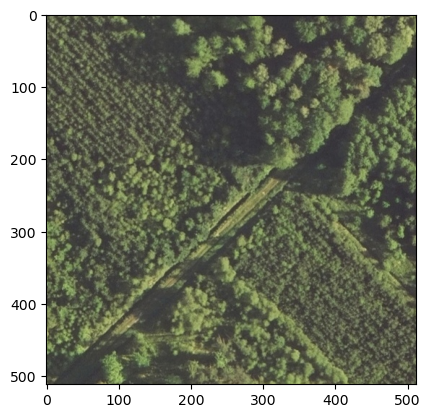

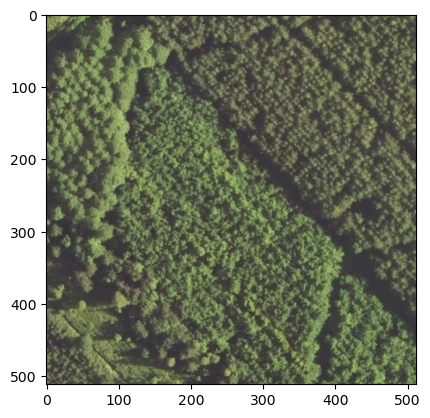

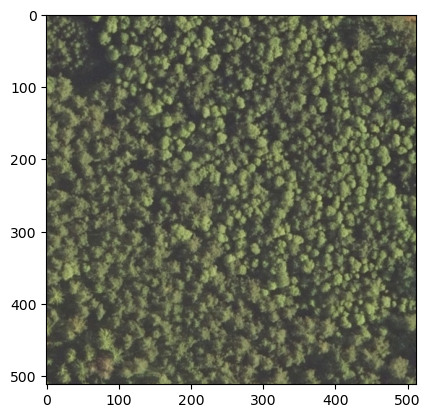

In [14]:
def image_view(path):
  for i in os.listdir(path)[:4]:
    if i.endswith('.jpg'):
      image = cv2.imread(os.path.join(path, i))
      plt.imshow(image[:,:,::-1])
      plt.show()

image_view('output/')



# Drift 

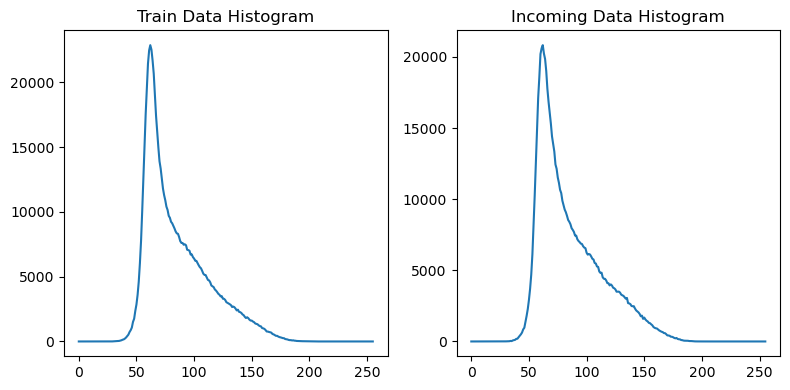

Drift detected! Data distribution has significantly changed.


In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_kl_divergence(train_data_path, incoming_data_path):
    # Load images
    train_data = cv2.imread(train_data_path)
    incoming_data = cv2.imread(incoming_data_path)

    # Check if images were loaded successfully
    if train_data is None or incoming_data is None:
        raise ValueError("One or both images could not be loaded.")

    # Flatten the images
    train_flat = train_data.flatten()
    incoming_flat = incoming_data.flatten()

    # Compute histogram of values in each dataset (for example, using numpy)
    train_hist = np.histogram(train_flat, bins=range(257))[0]
    incoming_hist = np.histogram(incoming_flat, bins=range(257))[0]

    # Plot histograms
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title('Train Data Histogram')
    plt.plot(train_hist)
    
    plt.subplot(1, 2, 2)
    plt.title('Incoming Data Histogram')
    plt.plot(incoming_hist)

    plt.tight_layout()
    plt.show()

    # Remove potential zero values in histograms to avoid zero division or logarithm issues
    train_hist = np.where(train_hist == 0, 1, train_hist)  # Replace zeros with 1
    incoming_hist = np.where(incoming_hist == 0, 1, incoming_hist)  # Replace zeros with 1

    # Compute KL Divergence
    kl_divergence = np.sum(train_hist * np.log(train_hist / incoming_hist))
    
    return kl_divergence

# Example usage
train_data_path = "output/M-33-20-D-c-4-2_0.jpg"
incoming_data_path = "output/M-33-20-D-c-4-2_10.jpg"

kl_divergence = calculate_kl_divergence(train_data_path, incoming_data_path)
threshold = 0.05  # Adjust this threshold based on your requirements

# Check if KL Divergence exceeds the threshold
if kl_divergence > threshold:
    print("Drift detected! Data distribution has significantly changed.")
else:
    print("No significant drift detected.")


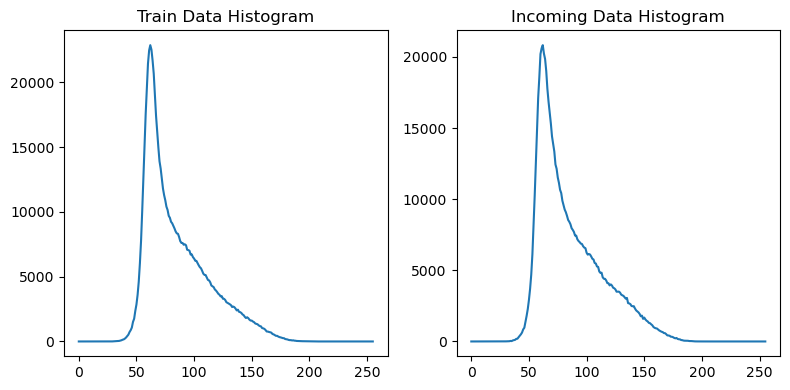

Drift detected! Data distribution has significantly changed.


In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_kl_divergence(train_data_path, incoming_data_path):
    # Load images
    train_data = cv2.imread(train_data_path)
    incoming_data = cv2.imread(incoming_data_path)

    # Check if images were loaded successfully
    if train_data is None or incoming_data is None:
        raise ValueError("One or both images could not be loaded.")

    # Flatten the images
    train_flat = train_data.flatten()
    incoming_flat = incoming_data.flatten()

    # Compute histogram of values in each dataset (for example, using numpy)
    train_hist = np.histogram(train_flat, bins=range(257))[0]
    incoming_hist = np.histogram(incoming_flat, bins=range(257))[0]

    # Plot histograms
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title('Train Data Histogram')
    plt.plot(train_hist)
    
    plt.subplot(1, 2, 2)
    plt.title('Incoming Data Histogram')
    plt.plot(incoming_hist)

    plt.tight_layout()
    plt.show()

    # Remove potential zero values in histograms to avoid zero division or logarithm issues
    train_hist = np.where(train_hist == 0, 1, train_hist)  # Replace zeros with 1
    incoming_hist = np.where(incoming_hist == 0, 1, incoming_hist)  # Replace zeros with 1

    # Compute KL Divergence
    kl_divergence = np.sum(train_hist * np.log(train_hist / incoming_hist))
    
    return kl_divergence

# Example usage
train_data_path = "output/M-33-20-D-c-4-2_0.jpg"
incoming_data_path = "output/M-33-20-D-c-4-2_10.jpg"

kl_divergence = calculate_kl_divergence(train_data_path, incoming_data_path)
threshold = 0.05  # Adjust this threshold based on your requirements

# Check if KL Divergence exceeds the threshold
if kl_divergence > threshold:
    print("Drift detected! Data distribution has significantly changed.")
else:
    print("No significant drift detected.")
